Importing library

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

%matplotlib inline



Load the data

In [24]:
data_frame = pd.read_csv('/home/roni/Code/Machine Learning/pima-data.csv')

Call the total number of row and column

In [25]:
data_frame.shape

(768, 10)



data_frame.head(number)

data_frame.head(3) ফাংশনটি কল করার মাধ্যমে আমরা ডেটাফ্রেমের প্রথম ৩ টি রো প্রিন্ট করলাম।

In [26]:
data_frame.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True


In [27]:
data_frame.tail(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


isnull()

এটা আবার সেই ডেটাফ্রেমকেই রিটার্ন করে কিন্তু পার্থক্য হল সেখানে আর ভ্যালু থাকে না, Empty Cell রিপ্লেস হয় True দিয়ে আর Non-Empty Cell রিপ্লেস হয় False দিয়ে।

In [28]:
print (data_frame.isnull())

num_preg  glucose_conc  diastolic_bp  thickness  insulin    bmi  \
0       False         False         False      False    False  False   
1       False         False         False      False    False  False   
2       False         False         False      False    False  False   
3       False         False         False      False    False  False   
4       False         False         False      False    False  False   
..        ...           ...           ...        ...      ...    ...   
763     False         False         False      False    False  False   
764     False         False         False      False    False  False   
765     False         False         False      False    False  False   
766     False         False         False      False    False  False   
767     False         False         False      False    False  False   

     diab_pred    age   skin  diabetes  
0        False  False  False     False  
1        False  False  False     False  
2        False  F

isnull() রিটার্ন করে ডেটাফ্রেম, কিন্তু .values দিলে সেটা True/False এর একটা অ্যারে তে পরিণত হয়।

In [29]:
print (data_frame.isnull().values)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


any() ফাংশন চেক করে অ্যারেতে থাকা কোন ভ্যালু ফাঁকা বা Empty কিনা।

pima-data.csv ফাইলে কোন ফাঁকা ডেটা নাই। তাই এই প্রোগ্রাম স্টেটমেন্টটি কল করলে False দেখায়।

In [30]:
print (data_frame.isnull().values.any())

False


In [33]:
# Here size means plot-size
def corr_heatmap(data_frame, size=11):
  # Getting correlation using Pandas
  correlation = data_frame.corr()

  # Dividing the plot into subplots for increasing size of plots
  fig, heatmap = plt.subplots(figsize=(size, size))

  # Plotting the correlation heatmap
  heatmap.matshow(correlation)

  # Adding xticks and yticks
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)

  # Displaying the graph
  plt.show()

plt.xticks(range(len(correlation.columns)), correlation.columns) এই কোড দিয়ে বুঝানো হয়েছে, প্রতি ব্লকের দৈর্ঘ্য হবে 1 একক করে এবং দাগগুলো হবে 0, 1, 2 ... len(correlation.columns) পর্যন্ত। আর পরবর্তী আর্গুমেন্ট (correlation.columns) দিয়ে প্রতিটা ব্লকের লেবেল দেওয়া হয়েছে।

plt.yticks.. এর জন্য একই কথা প্রযোজ্য।

corr_heatmap(data_frame, size) ফাংশনের মাধ্যমে হিটম্যাপ প্লটিং

কষ্ট করে ফাংশন লিখলাম আর না ব্যবহার করলে চলে? নিচের কোড স্নিপেট দিয়ে সহজেই হিটম্যাপ প্লট করতে পারি,

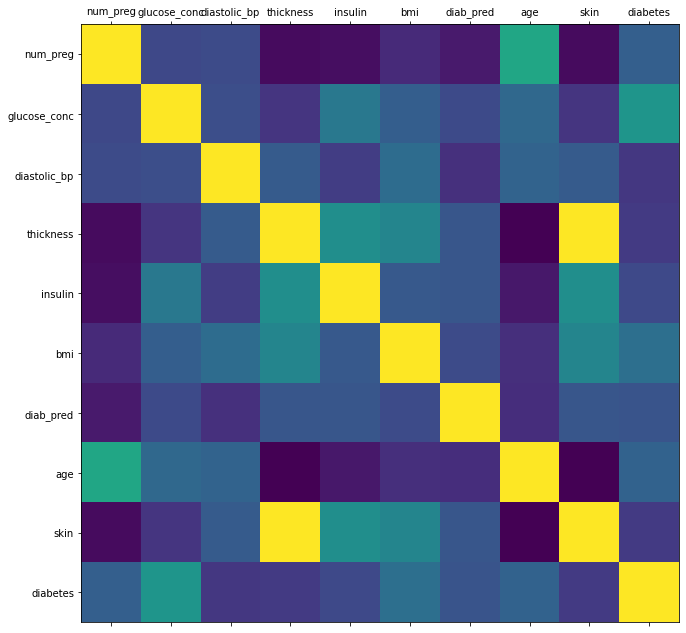

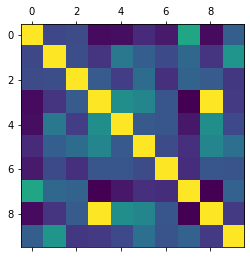

In [34]:
corr_heatmap(data_frame)

skin এবং thickness এই দুইটার কো-রিলেশন কিন্তু 1 (গাঢ় yellow রং)।

তারমানে, skin আর thickness আসলে একই জিনিস, একক এর হেরফের হয়েছে শুধু।

In [35]:
#Deleting 'skin' column completely
del data_frame['skin']
#Checking if the action was successful or not
data_frame.head()  

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


আমরা একটা ডুপ্লিকেট কলাম কে ফেলে দিতে পারলাম। এখনো কাজ শেষ হয় নাই, ডেটা মোল্ড করতে হবে। ডেটা প্রিপারেশনের এটাই শেষ ধাপ। So cheers!

ডেটা টাইপ চেঞ্জিং


True কে আমরা 1 বানাবো এবং False কে বানাব 0। 

In [36]:
#Maping the values 
map_diabetes = {True: 1, False: 0}

# Setting the  map to the data_frame
data_frame['diabetes'] = data_frame['diabetes'].map(map_diabetes)

# Lets see what we have done
data_frame.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
num_true = 0.0
num_false = 0.0
for item in data_frame['diabetes']:
    if item == True:
        num_true += 1
    else:
        num_false += 1

percent_true = (num_true / (num_true + num_false)) * 100
percent_false = (num_false / (num_true + num_false)) * 100

print ("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, percent_true))
print ("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, percent_false))

Number of True Cases: 268.0 (34.90%)
Number of False Cases: 500.0 (65.10%)


In [39]:
# Pythonic Way
num_true = len(data_frame.loc[data_frame['diabetes'] == True])
num_false = len(data_frame.loc[data_frame['diabetes'] == False])
print ("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print ("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, (num_true / (num_true + num_false)) * 100))

Number of True Cases: 268 (34.90%)
Number of False Cases: 500 (34.90%)
